In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime
from functools import reduce
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 10)
np.random.seed(1984)

## Create Main CANS DataFrame
- The aim of this is to replicate the Standard CANS Comprehensive Assessment 
- The columns have been created based on the form from the [Praed Foundation Website](https://praedfoundation.org/general-forms-cans/ "Praed Form")
- Random participant information will be generated and then each participant will receive scores from an assessor 
- Minors will be placed in relevant trauma modules and futher assessed if their initial scores meet the specific needs criteria 
- Below are the steps to create a mock dataframe and CANS assessment to help provide data analysis and guide treatment plans

In [7]:
# Open CANS PDF
import webbrowser as wb
wb.open_new(r'Standard_CANS-Comprehensive_2.0_CWBH_10032016 (1).pdf')

True

In [8]:
# Create comprehensive columns
Comprehensive = ["Case_Number","Child's_Name","DOB","Age","Region","Date_of_Assessment","Assessor","Family_Functioning","Living_Situation","Social_Functioning","Recreational","Developmental_Intellectual",
"Job_Functioning","Legal","Medical_Physical","Sexual_Development","Sleep","School_Behavior","School_Attendance","School_Achievement","Decision_Making","Family_Strengths","Interpersonal","Optimism",
"Educational_Setting","Vocational","Talents_Interests","Spiritual_Religious","Community_Life","Relationship_Permanence","Resiliency","Resourcefulness","Cultural_Identity","Natural_Supports","Language",
"Traditions_Rituals","Cultural_Stress","Supervision","Involvement_with_Care","Knowledge","Organization","Social_Resources","Residential_Stability","Medical_Physical","Mental_Health","Substance_Usage",
"Developmental","Safety","Psychosis","Impulsivity_Hyperactivity","Depression","Anxiety","Oppositional","Conduct","Adjustment_to_Trauma","Attachment_Difficulties","Anger_Control","Substance_Use",
"Suicide_Risk","NonSuicidal_Self_Injurious_Behavior","Other_Self_Harm", "Danger_to_Others","Sexual_Aggression","Runaway","Delinquent_Behavior","Fire_Setting","Intentional_Misbehavior"]

In [9]:
# Create data only columns 
data_col = ["Family_Functioning","Living_Situation","Social_Functioning","Recreational","Developmental_Intellectual","Job_Functioning","Legal","Medical_Physical","Sexual_Development","Sleep",
"School_Behavior", "School_Attendance","School_Achievement","Decision_Making","Family_Strengths","Interpersonal","Optimism","Educational_Setting","Vocational","Talents_Interests","Spiritual_Religious",
"Community_Life","Relationship_Permanence","Resiliency","Resourcefulness","Cultural_Identity","Natural_Supports","Language","Traditions_Rituals","Cultural_Stress","Supervision","Involvement_with_Care",
"Knowledge","Organization","Social_Resources","Residential_Stability","Medical_Physical","Mental_Health","Substance_Usage","Developmental","Safety","Psychosis","Impulsivity_Hyperactivity","Depression",
"Anxiety","Oppositional","Conduct","Adjustment_to_Trauma","Attachment_Difficulties","Anger_Control","Substance_Use","Suicide_Risk","NonSuicidal_Self_Injurious_Behavior","Other_Self_Harm",
"Danger_to_Others","Sexual_Aggression","Runaway","Delinquent_Behavior","Fire_Setting","Intentional_Misbehavior"]

In [10]:
# Create list of popular first names to be used for participants 
first_name = ["Jacob", "Ethan", "Michael", "Jayden", "William", "Alexander", "Noah", "Daniel", "Aiden", "Anthony", "Joshua", "Mason", "Christopher", "Andrew", "David", "Matthew", "Logan", "Elijah", 
         "James", "Joseph", "Gabriel", "Benjamin", "Ryan", "Samuel", "Jackson", "John", "Nathan", "Jonathan", "Christian", "Liam", "Dylan", "Caleb", "Landon", "Tyler", "Lucas", "Evan", "Nicholas",
         "Gavin", "Isaac", "Brayden", "Luke", "Angel", "Isaiah", "Brandon", "Jack", "Jordan", "Owen", "Carter", "Connor", "Justin", "Jeremiah", "Jose", "Julian", "Robert", "Aaron", "Adrian", "Wyatt", 
         "Kevin", "Hunter", "Cameron", "Zachary", "Thomas", "Charles", "Austin", "Eli", "Chase", "Henry", "Sebastian", "Jason", "Levi", "Xavier", "Ian", "Colton", "Dominic", "Cooper", "Juan",
         "Josiah", "Ayden", "Luis", "Adam", "Nathaniel", "Carson", "Brody", "Tristan", "Parker", "Diego", "Blake", "Oliver", "Carlos", "Cole", "Jaden", "Jesus", "Alex", "Aidan", "Eric", "Hayden",
         "Bryan", "Max", "Jaxon", "Bentley", "Brian", "Sean", "Alejandro", "Nolan", "Riley", "Kaden", "Kyle", "Micah", "Vincent", "Antonio", "Colin", "Bryce", "Miguel", "Timothy", "Jake", "Giovanni",
         "Steven", "Kaleb", "Caden", "Bryson", "Damian", "Grayson", "Kayden", "Jesse", "Ashton", "Brady", "Richard", "Victor", "Patrick", "Marcus", "Preston", "Joel", "Maxwell", "Santiago", "Ryder",
         "Edward", "Miles", "Asher", "Hudson", "Devin", "Elias", "Jeremy", "Jonah", "Ivan", "Easton", "Jace", "Oscar", "Collin", "Peyton", "Leonardo", "Cayden", "Gage", "Emmanuel", "Eduardo", "Grant",
         "Alan", "Cody", "Conner", "Wesley", "Kenneth", "Mark", "Malachi", "Nicolas", "Seth", "George", "Kaiden", "Trevor", "Jude", "Jorge", "Derek", "Braxton", "Sawyer", "Jaxson", "Jaiden", "Omar",
         "Tanner", "Paul", "Travis", "Maddox", "Camden", "Andres", "Cristian", "Rylan", "Josue", "Bradley", "Roman", "Axel", "Garrett", "Fernando", "Javier", "Leo", "Damien", "Peter", "Abraham",
         "Ricardo", "Francisco", "Drake", "Shane", "Lincoln", "Erick", "Cesar", "Stephen", "Jaylen", "Tucker", "Kai", "Landen", "Braden", "Mario", "Edwin", "Manuel", "Avery", "Trenton", "Ezekiel",
         "Kingston", "Calvin", "Johnathan", "Edgar", "Donovan", "Silas", "Israel", "Jeffrey", "Mateo", "Alexis", "Weston", "Raymond", "Hector", "Spencer", "Andre", "Lukas", "Brendan", "Zion",
         "Griffin", "Harrison", "Maximus", "Andy", "Braylon", "Shawn", "Tyson", "Zane", "Emiliano", "Sergio", "Ezra", "Jared", "Chance", "Keegan", "Charlie", "Drew", "Troy", "Greyson", "Simon",
         "Clayton", "Corbin", "Myles", "Xander", "Dante", "Erik", "Rafael", "Martin", "Theodore", "Dalton", "Dominick", "Skyler", "Cash", "Marco", "Caiden", "Ty", "Johnny", "Gregory", "Kyler",
         "Brennan", "Emmett", "Luca", "Roberto", "Declan", "Kameron", "Quinn", "Jameson", "Amir", "Bennett", "Colby", "Emanuel", "Malik", "Pedro", "Graham", "Dean", "Jasper", "Everett", "Aden", 
         "Dawson", "Angelo", "Reid", "Dakota", "Abel", "Zander", "Judah", "Paxton", "Ruben", "Jakob", "Jayce", "Finn", "Elliot", "Frank", "Lane", "Dillon", "Fabian", "Brock", "Derrick", "Emilio",
         "Ryker", "Joaquin", "Marcos", "Devon", "Anderson", "Grady", "Elliott", "Corey", "Holden", "Amari", "Dallas", "Danny", "Cruz", "Allen", "Trey", "Lorenzo", "Leland", "Armando", "Rowan",
         "Taylor", "Cade", "Felix", "Adan", "Colt", "Tristen", "Jayson", "Julius", "Nehemiah", "Julio", "Zayden", "Darius", "Raul", "Braydon", "Louis", "Ronald", "Trent", "Payton", "Keith", "Randy",
         "Jax", "Desmond", "Enrique", "Jett", "Scott", "Dustin", "Gerardo", "Phillip", "Beckett", "Ali", "Isabella", "Sophia", "Emma", "Olivia", "Ava", "Emily", "Abigail", "Madison", "Chloe", "Mia",
         "Addison", "Elizabeth", "Ella", "Natalie", "Samantha", "Alexis", "Lily", "Grace", "Hailey", "Alyssa", "Hannah", "Lillian", "Avery", "Leah", "Nevaeh", "Anna", "Sarah", "Sofia", "Ashley",
         "Brianna", "Zoe", "Victoria", "Gabriella", "Brooklyn", "Kaylee", "Taylor", "Layla", "Allison", "Evelyn", "Riley", "Amelia", "Khloe", "Makayla", "Savannah", "Aubrey", "Charlotte", "Zoey",
         "Bella", "Kayla", "Alexa", "Peyton", "Audrey", "Claire", "Arianna", "Julia", "Aaliyah", "Kylie", "Lauren", "Sophie", "Sydney", "Camila", "Jasmine", "Morgan", "Alexandra", "Jocelyn", "Maya",
         "Gianna", "Mackenzie", "Kimberly", "Katherine", "Destiny", "Brooke", "Trinity", "Faith", "Lucy", "Madelyn", "Madeline", "Bailey", "Payton", "Andrea", "Autumn", "Melanie", "Serenity", "Ariana",
         "Stella", "Maria", "Molly", "Caroline", "Genesis", "Kaitlyn", "Eva", "Jessica", "Angelina", "Gabrielle", "Naomi", "Valeria", "Mariah", "Natalia", "Rachel", "Paige", "Mya", "Rylee", "Katelyn",
         "Ellie", "Isabelle", "Lilly", "Vanessa", "London", "Mary", "Kennedy", "Lydia", "Jordyn", "Ruby", "Jade", "Scarlett", "Isabel", "Annabelle", "Harper", "Sadie", "Sara", "Jennifer", "Nicole", 
         "Violet", "Liliana", "Michelle", "Stephanie", "Reagan", "Jada", "Adriana", "Gracie", "Megan", "Jayla", "Kendall", "Rebecca", "Lyla", "Amy", "Reese", "Izabella", "Kylee", "Laila", "Jenna",
         "Brooklynn", "Aliyah", "Piper", "Mckenzie", "Juliana", "Giselle", "Gabriela", "Valerie", "Daniela", "Daisy", "Valentina", "Makenzie", "Haley", "Lila", "Melissa", "Ashlyn", "Vivian", "Nora",
         "Angela", "Katie", "Hayden", "Elena", "Summer", "Keira", "Eleanor", "Clara", "Eliana", "Alana", "Jillian", "Jacqueline", "Alice", "Adrianna", "Miranda", "Alivia", "Julianna", "Aniyah", 
         "Jordan", "Eden", "Mikayla", "Skylar", "Margaret", "Briana", "Shelby", "Josephine", "Ryleigh", "Delilah", "Amanda", "Allie", "Diana", "Addyson", "Brielle", "Catherine", "Angel", "Danielle", 
         "Elise", "Ana", "Melody", "Leslie", "Penelope", "Makenna", "Marissa", "Aurora", "Alexandria", "Leila", "Alaina", "Kendra", "Kate", "Delaney", "Sienna", "Lola", "Jayden", "Ariel", "Sierra", 
         "Erin", "Miley", "Carly", "Hadley", "Sabrina", "Alicia"]

In [11]:
# Create list of last names and format correctly 
last_name = ["SMITH","JOHNSON","WILLIAMS","JONES","BROWN","DAVIS","MILLER","WILSON","MOORE","TAYLOR","ANDERSON","THOMAS","JACKSON","WHITE","HARRIS","MARTIN","THOMPSON","GARCIA",
"MARTINEZ","CLARK","RODRIGUEZ","LEWIS","LEE","WALKER","HALL","ALLEN","YOUNG","HERNANDEZ","KING","WRIGHT","LOPEZ","HILL","SCOTT","GREEN","ADAMS","BAKER","GONZALEZ","NELSON",
"CARTER","MITCHELL","PEREZ","ROBERTS","TURNER","PHILLIPS","CAMPBELL","PARKER","EVANS","EDWARDS","COLLINS","STEWART","FREEMAN"]
last_name_converted = [x.capitalize() for x in last_name]

In [12]:
# Create list of mock assessors
assessors = ["Noah", "William", "Jacob", "Michael", "Emma", "Olivia", "Ava", "Sophia", "Isabella", "Mia"]

In [13]:
# Create list of participant regions 
regions = ["Northeast", "Midwest", "South", "West"]

In [14]:
# Create index for participant dataframe 
index = range(0,25000)

In [15]:
# Assign each minor a unique case number
assessment = pd.DataFrame({ "Case_Number" : np.random.randint(100000000,1000000000,25000)})

In [16]:
# Ensure there are no duplictes 
assessment["Case_Number"].nunique()

25000

In [17]:
# Give each minor a first name
assessment["First_Name"] = np.random.choice(list(first_name), len(assessment))

In [18]:
# Give each minor a last name
assessment["Last_Name"] = np.random.choice(list(last_name_converted), len(assessment))

In [19]:
# Create a full name column 
assessment["Child's_Name"] = assessment["First_Name"] + " " + assessment["Last_Name"]

In [20]:
# drop original name columns
assessment.drop(columns=['First_Name', 'Last_Name'], inplace=True)

In [21]:
# Give each participant a date of birth 
assessment['DOB'] = [np.random.choice(pd.date_range(datetime.datetime(2003,1,1),datetime.datetime(2015,10,4))) for i in range(25000)]

In [22]:
# Create a function to assign each participant an age based on current date 
def get_age(birthday):
    today = datetime.date.today()
    return today.year - birthday.year - ((today.month, today.day) < (birthday.month, birthday.day))

In [23]:
# Apply function and convert date of birth to datetime object
assessment['Age'] = assessment['DOB'].apply(lambda x: get_age(x))
assessment["DOB"] = pd.to_datetime(assessment["DOB"]).dt.strftime('%m/%d/%Y')

In [24]:
# Assign each participant a region
assessment['Region'] = np.random.choice(list(regions), len(assessment))

In [25]:
# Check dataframe 
assessment.head(2)

,Case_Number,Child's_Name,DOB,Age,Region
0,137605596,Harrison Jones,10/25/2013,6,Northeast
1,615143279,Edwin Brown,06/22/2008,12,South


## Create first CANS assessment for each participant 

In [26]:
# assign random date from first three months of 2020
assessment["Date_of_Assessment"] = [np.random.choice(pd.date_range(datetime.datetime(2020,1,1),datetime.datetime(2020,3,31))) for i in range(25000)]
assessment["Date_of_Assessment"] = pd.to_datetime(assessment["Date_of_Assessment"]).dt.strftime('%m/%d/%Y')

In [27]:
# assign each participant an assessor 
assessment["Assessor"] = np.random.choice(list(assessors), len(assessment))

In [28]:
assessment.head(2)

,Case_Number,Child's_Name,DOB,Age,Region,Date_of_Assessment,Assessor
0,137605596,Harrison Jones,10/25/2013,6,Northeast,03/27/2020,Emma
1,615143279,Edwin Brown,06/22/2008,12,South,03/21/2020,Noah


In [29]:
# create random scores to impute for the first assessment 
data_1 = np.random.randint(0,4, size=(25000,60))

In [30]:
# create dataframe with scores and matching columns
cans_1 = pd.DataFrame(data_1, columns=data_col)

In [31]:
cans_1.head(2)

,Family_Functioning,Living_Situation,Social_Functioning,Recreational,Developmental_Intellectual,Job_Functioning,Legal,Medical_Physical,Sexual_Development,Sleep,School_Behavior,School_Attendance,School_Achievement,Decision_Making,Family_Strengths,Interpersonal,Optimism,Educational_Setting,Vocational,Talents_Interests,Spiritual_Religious,Community_Life,Relationship_Permanence,Resiliency,Resourcefulness,Cultural_Identity,Natural_Supports,Language,Traditions_Rituals,Cultural_Stress,Supervision,Involvement_with_Care,Knowledge,Organization,Social_Resources,Residential_Stability,Medical_Physical,Mental_Health,Substance_Usage,Developmental,Safety,Psychosis,Impulsivity_Hyperactivity,Depression,Anxiety,Oppositional,Conduct,Adjustment_to_Trauma,Attachment_Difficulties,Anger_Control,Substance_Use,Suicide_Risk,NonSuicidal_Self_Injurious_Behavior,Other_Self_Harm,Danger_to_Others,Sexual_Aggression,Runaway,Delinquent_Behavior,Fire_Setting,Intentional_Misbehavior
0,0,1,0,3,1,1,3,0,2,3,2,1,1,1,1,2,3,3,0,0,3,1,0,1,1,1,3,1,2,1,3,1,2,0,1,1,2,3,1,2,1,0,3,3,3,0,2,1,2,3,0,2,2,1,1,0,0,1,0,0
1,2,2,1,2,2,1,3,1,0,1,2,0,0,2,0,2,1,1,2,1,3,1,2,0,0,1,2,2,2,3,0,2,2,0,0,0,1,0,0,1,1,1,1,3,0,3,1,2,0,1,2,3,0,1,3,2,0,3,2,3


In [32]:
# Concatenate the assessment information with the CANS scores
df_1 = pd.concat([assessment,cans_1], axis=1)

In [33]:
# Check dataframe
df_1.head(3)

,Case_Number,Child's_Name,DOB,Age,Region,Date_of_Assessment,Assessor,Family_Functioning,Living_Situation,Social_Functioning,Recreational,Developmental_Intellectual,Job_Functioning,Legal,Medical_Physical,Sexual_Development,Sleep,School_Behavior,School_Attendance,School_Achievement,Decision_Making,Family_Strengths,Interpersonal,Optimism,Educational_Setting,Vocational,Talents_Interests,Spiritual_Religious,Community_Life,Relationship_Permanence,Resiliency,Resourcefulness,Cultural_Identity,Natural_Supports,Language,Traditions_Rituals,Cultural_Stress,Supervision,Involvement_with_Care,Knowledge,Organization,Social_Resources,Residential_Stability,Medical_Physical,Mental_Health,Substance_Usage,Developmental,Safety,Psychosis,Impulsivity_Hyperactivity,Depression,Anxiety,Oppositional,Conduct,Adjustment_to_Trauma,Attachment_Difficulties,Anger_Control,Substance_Use,Suicide_Risk,NonSuicidal_Self_Injurious_Behavior,Other_Self_Harm,Danger_to_Others,Sexual_Aggression,Runaway,Delinquent_Behavior,Fire_Setting,Intentional_Misbehavior
0,137605596,Harrison Jones,10/25/2013,6,Northeast,03/27/2020,Emma,0,1,0,3,1,1,3,0,2,3,2,1,1,1,1,2,3,3,0,0,3,1,0,1,1,1,3,1,2,1,3,1,2,0,1,1,2,3,1,2,1,0,3,3,3,0,2,1,2,3,0,2,2,1,1,0,0,1,0,0
1,615143279,Edwin Brown,06/22/2008,12,South,03/21/2020,Noah,2,2,1,2,2,1,3,1,0,1,2,0,0,2,0,2,1,1,2,1,3,1,2,0,0,1,2,2,2,3,0,2,2,0,0,0,1,0,0,1,1,1,1,3,0,3,1,2,0,1,2,3,0,1,3,2,0,3,2,3
2,309360639,Ashton Wilson,10/28/2005,14,West,02/11/2020,Michael,1,2,1,1,1,2,3,2,3,1,0,0,3,3,2,0,2,0,3,2,3,1,0,3,2,2,2,2,0,2,2,2,0,0,2,0,3,0,2,2,0,3,0,3,2,3,2,2,2,0,3,3,0,0,1,3,3,1,2,1


In [34]:
# Ensure no duplicates
df_1.duplicated().sum(), df_1.isna().sum().sum()

(0, 0)

## Create second CANS assessment for each minor

In [35]:
# Create an assessment for the next 3 months as it is important to keep cases fresh
assessment["Date_of_Assessment"] = [np.random.choice(pd.date_range(datetime.datetime(2020,4,1),datetime.datetime(2020,6,30))) for i in range(25000)]
assessment["Date_of_Assessment"] = pd.to_datetime(assessment["Date_of_Assessment"]).dt.strftime('%m/%d/%Y')

In [36]:
# Create random scores for the second assessment
data_2 = np.random.randint(0,4, size=(25000,60))

In [37]:
# Create dataframe with scores and matching columns
cans_2 = pd.DataFrame(data_2, columns=data_col)

In [38]:
# Concatenate the assessment information with the CANS scores
df_2 = pd.concat([assessment,cans_2], axis=1)

In [39]:
df_2.head(2)

,Case_Number,Child's_Name,DOB,Age,Region,Date_of_Assessment,Assessor,Family_Functioning,Living_Situation,Social_Functioning,Recreational,Developmental_Intellectual,Job_Functioning,Legal,Medical_Physical,Sexual_Development,Sleep,School_Behavior,School_Attendance,School_Achievement,Decision_Making,Family_Strengths,Interpersonal,Optimism,Educational_Setting,Vocational,Talents_Interests,Spiritual_Religious,Community_Life,Relationship_Permanence,Resiliency,Resourcefulness,Cultural_Identity,Natural_Supports,Language,Traditions_Rituals,Cultural_Stress,Supervision,Involvement_with_Care,Knowledge,Organization,Social_Resources,Residential_Stability,Medical_Physical,Mental_Health,Substance_Usage,Developmental,Safety,Psychosis,Impulsivity_Hyperactivity,Depression,Anxiety,Oppositional,Conduct,Adjustment_to_Trauma,Attachment_Difficulties,Anger_Control,Substance_Use,Suicide_Risk,NonSuicidal_Self_Injurious_Behavior,Other_Self_Harm,Danger_to_Others,Sexual_Aggression,Runaway,Delinquent_Behavior,Fire_Setting,Intentional_Misbehavior
0,137605596,Harrison Jones,10/25/2013,6,Northeast,06/13/2020,Emma,2,3,2,3,2,1,0,2,0,2,0,3,1,1,2,3,2,0,2,0,2,3,1,0,1,2,1,3,0,1,0,0,0,1,2,0,2,1,1,2,2,3,3,0,3,3,2,0,1,2,3,0,1,2,2,0,0,0,2,3
1,615143279,Edwin Brown,06/22/2008,12,South,04/20/2020,Noah,1,3,2,2,0,1,2,0,3,3,3,2,3,3,3,0,2,1,1,2,0,3,3,1,2,1,0,0,1,3,0,1,2,1,1,2,1,0,1,3,0,1,3,2,0,0,2,2,2,2,1,2,2,2,2,0,2,1,3,2


In [40]:
# Ensure no duplicates
df_2.duplicated().sum(), df_2.isna().sum().sum()

(0, 0)

## Create a main dataframe with both assessments so we can compare scores over time and better assess needs and strengths 

In [41]:
dfs = [df_1, df_2]

In [42]:
# Join dataframes on Case Number
main_df = reduce(lambda left,right: pd.merge(left,right,on='Case_Number'), dfs)

In [43]:
# Check data
main_df

,Case_Number,Child's_Name_x,DOB_x,Age_x,Region_x,Date_of_Assessment_x,Assessor_x,Family_Functioning_x,Living_Situation_x,Social_Functioning_x,Recreational_x,Developmental_Intellectual_x,Job_Functioning_x,Legal_x,Medical_Physical_x,Sexual_Development_x,Sleep_x,School_Behavior_x,School_Attendance_x,School_Achievement_x,Decision_Making_x,Family_Strengths_x,Interpersonal_x,Optimism_x,Educational_Setting_x,Vocational_x,Talents_Interests_x,Spiritual_Religious_x,Community_Life_x,Relationship_Permanence_x,Resiliency_x,Resourcefulness_x,Cultural_Identity_x,Natural_Supports_x,Language_x,Traditions_Rituals_x,Cultural_Stress_x,Supervision_x,Involvement_with_Care_x,Knowledge_x,Organization_x,Social_Resources_x,Residential_Stability_x,Medical_Physical_x,Mental_Health_x,Substance_Usage_x,Developmental_x,Safety_x,Psychosis_x,Impulsivity_Hyperactivity_x,Depression_x,Anxiety_x,Oppositional_x,Conduct_x,Adjustment_to_Trauma_x,Attachment_Difficulties_x,Anger_Control_x,Substance_Use_x,Suicide_Risk_x,NonSuicidal_Self_Injurious_Behavior_x,Other_Self_Harm_x,Danger_to_Others_x,Sexual_Aggression_x,Runaway_x,Delinquent_Behavior_x,Fire_Setting_x,Intentional_Misbehavior_x,Child's_Name_y,DOB_y,Age_y,Region_y,Date_of_Assessment_y,Assessor_y,Family_Functioning_y,Living_Situation_y,Social_Functioning_y,Recreational_y,Developmental_Intellectual_y,Job_Functioning_y,Legal_y,Medical_Physical_y,Sexual_Development_y,Sleep_y,School_Behavior_y,School_Attendance_y,School_Achievement_y,Decision_Making_y,Family_Strengths_y,Interpersonal_y,Optimism_y,Educational_Setting_y,Vocational_y,Talents_Interests_y,Spiritual_Religious_y,Community_Life_y,Relationship_Permanence_y,Resiliency_y,Resourcefulness_y,Cultural_Identity_y,Natural_Supports_y,Language_y,Traditions_Rituals_y,Cultural_Stress_y,Supervision_y,Involvement_with_Care_y,Knowledge_y,Organization_y,Social_Resources_y,Residential_Stability_y,Medical_Physical_y,Mental_Health_y,Substance_Usage_y,Developmental_y,Safety_y,Psychosis_y,Impulsivity_Hyperactivity_y,Depression_y,Anxiety_y,Oppositional_y,Conduct_y,Adjustment_to_Trauma_y,Attachment_Difficulties_y,Anger_Control_y,Substance_Use_y,Suicide_Risk_y,NonSuicidal_Self_Injurious_Behavior_y,Other_Self_Harm_y,Danger_to_Others_y,Sexual_Aggression_y,Runaway_y,Delinquent_Behavior_y,Fire_Setting_y,Intentional_Misbehavior_y
0,137605596,Harrison Jones,10/25/2013,6,Northeast,03/27/2020,Emma,0,1,0,3,1,1,3,0,2,3,2,1,1,1,1,2,3,3,0,0,3,1,0,1,1,1,3,1,2,1,3,1,2,0,1,1,2,3,1,2,1,0,3,3,3,0,2,1,2,3,0,2,2,1,1,0,0,1,0,0,Harrison Jones,10/25/2013,6,Northeast,06/13/2020,Emma,2,3,2,3,2,1,0,2,0,2,0,3,1,1,2,3,2,0,2,0,2,3,1,0,1,2,1,3,0,1,0,0,0,1,2,0,2,1,1,2,2,3,3,0,3,3,2,0,1,2,3,0,1,2,2,0,0,0,2,3
1,615143279,Edwin Brown,06/22/2008,12,South,03/21/2020,Noah,2,2,1,2,2,1,3,1,0,1,2,0,0,2,0,2,1,1,2,1,3,1,2,0,0,1,2,2,2,3,0,2,2,0,0,0,1,0,0,1,1,1,1,3,0,3,1,2,0,1,2,3,0,1,3,2,0,3,2,3,Edwin Brown,06/22/2008,12,South,04/20/2020,Noah,1,3,2,2,0,1,2,0,3,3,3,2,3,3,3,0,2,1,1,2,0,3,3,1,2,1,0,0,1,3,0,1,2,1,1,2,1,0,1,3,0,1,3,2,0,0,2,2,2,2,1,2,2,2,2,0,2,1,3,2
2,309360639,Ashton Wilson,10/28/2005,14,West,02/11/2020,Michael,1,2,1,1,1,2,3,2,3,1,0,0,3,3,2,0,2,0,3,2,3,1,0,3,2,2,2,2,0,2,2,2,0,0,2,0,3,0,2,2,0,3,0,3,2,3,2,2,2,0,3,3,0,0,1,3,3,1,2,1,Ashton Wilson,10/28/2005,14,West,04/11/2020,Michael,2,3,0,2,2,2,2,2,0,0,0,3,3,1,0,1,3,1,2,1,1,3,1,0,2,1,3,1,2,2,0,1,0,1,0,1,3,2,1,0,1,3,1,0,3,0,3,1,3,1,3,3,1,0,2,2,0,2,3,0
3,781182963,Jeffrey Evans,03/06/2004,16,Midwest,01/19/2020,Ava,3,1,1,3,2,3,0,0,2,3,2,2,0,3,1,0,1,1,0,3,1,1,1,2,2,3,2,1,1,2,3,0,1,0,0,0,1,0,2,3,3,2,0,0,2,2,3,0,0,0,3,2,3,2,3,0,3,1,2,0,Jeffrey Evans,03/06/2004,16,Midwest,05/15/2020,Ava,0,3,1,2,3,1,1,0,3,0,0,1,2,0,0,3,2,0,0,3,3,1,1,3,1,0,1,2,1,3,0,2,3,3,1,1,0,0,0,1,0,0,1,3,2,1,3,2,1,1,3,0,0,2,1,3,1,2,0,0
4,342296601,Anthony Smith,04/21/2010,10,South,03/09/2020,Mia,2,0,1,3,3,0,3,1,3,1,3,1,3,2,2,1,0,3,1,2,3,1,1,2,0,0,3,2,0,0,3,0,1,3,3,1,3,2,3,3,3,3,3,1,0,3,3,1,1,1,0,0,2,1,0,1,2,3,0,3,Anthony Smith,04/21/2010,10,South,06/27/2020,Mia,3,0,1,0,2,3,2,2,1,1,1,1,1,1,2,0,0,2,0,3,3,1

In [44]:
# Save main dataframe 
main_df.to_csv('main_df.csv', index=False)
main_df.to_excel('main_df.xlsx', index=False)

## Create Trauma Modules
- If a participant receives above the threshold for both assessments they will be place in the respective module and further assessed

In [45]:
# Create each module
developmental_module = main_df[(main_df['Developmental_Intellectual_x'] > 1) & (main_df['Developmental_Intellectual_y'] > 1)]
trauma_module = main_df[(main_df['Adjustment_to_Trauma_x'] > 1) & (main_df['Adjustment_to_Trauma_y'] > 1)]  
substance_module = main_df[(main_df['Substance_Use_x'] > 1) & (main_df['Substance_Use_y'] > 1)] 
violence_module = main_df[(main_df['Danger_to_Others_x'] > 1) & (main_df['Danger_to_Others_y'] > 1)] 
sexual_module = main_df[(main_df['Sexual_Aggression_x'] > 1) & (main_df['Sexual_Aggression_y'] > 1)]  
runaway_module = main_df[(main_df['Runaway_x'] > 1) & (main_df['Runaway_y'] > 1)]  
juvenile_module = main_df[(main_df['Delinquent_Behavior_x'] > 1) & (main_df['Delinquent_Behavior_y'] > 1)]  
fire_module = main_df[(main_df['Fire_Setting_x'] > 1) & (main_df['Fire_Setting_y'] > 1)]   

In [48]:
# Check example 
developmental_module.head(2)

,Case_Number,Child's_Name_x,DOB_x,Age_x,Region_x,Date_of_Assessment_x,Assessor_x,Family_Functioning_x,Living_Situation_x,Social_Functioning_x,Recreational_x,Developmental_Intellectual_x,Job_Functioning_x,Legal_x,Medical_Physical_x,Sexual_Development_x,Sleep_x,School_Behavior_x,School_Attendance_x,School_Achievement_x,Decision_Making_x,Family_Strengths_x,Interpersonal_x,Optimism_x,Educational_Setting_x,Vocational_x,Talents_Interests_x,Spiritual_Religious_x,Community_Life_x,Relationship_Permanence_x,Resiliency_x,Resourcefulness_x,Cultural_Identity_x,Natural_Supports_x,Language_x,Traditions_Rituals_x,Cultural_Stress_x,Supervision_x,Involvement_with_Care_x,Knowledge_x,Organization_x,Social_Resources_x,Residential_Stability_x,Medical_Physical_x,Mental_Health_x,Substance_Usage_x,Developmental_x,Safety_x,Psychosis_x,Impulsivity_Hyperactivity_x,Depression_x,Anxiety_x,Oppositional_x,Conduct_x,Adjustment_to_Trauma_x,Attachment_Difficulties_x,Anger_Control_x,Substance_Use_x,Suicide_Risk_x,NonSuicidal_Self_Injurious_Behavior_x,Other_Self_Harm_x,Danger_to_Others_x,Sexual_Aggression_x,Runaway_x,Delinquent_Behavior_x,Fire_Setting_x,Intentional_Misbehavior_x,Child's_Name_y,DOB_y,Age_y,Region_y,Date_of_Assessment_y,Assessor_y,Family_Functioning_y,Living_Situation_y,Social_Functioning_y,Recreational_y,Developmental_Intellectual_y,Job_Functioning_y,Legal_y,Medical_Physical_y,Sexual_Development_y,Sleep_y,School_Behavior_y,School_Attendance_y,School_Achievement_y,Decision_Making_y,Family_Strengths_y,Interpersonal_y,Optimism_y,Educational_Setting_y,Vocational_y,Talents_Interests_y,Spiritual_Religious_y,Community_Life_y,Relationship_Permanence_y,Resiliency_y,Resourcefulness_y,Cultural_Identity_y,Natural_Supports_y,Language_y,Traditions_Rituals_y,Cultural_Stress_y,Supervision_y,Involvement_with_Care_y,Knowledge_y,Organization_y,Social_Resources_y,Residential_Stability_y,Medical_Physical_y,Mental_Health_y,Substance_Usage_y,Developmental_y,Safety_y,Psychosis_y,Impulsivity_Hyperactivity_y,Depression_y,Anxiety_y,Oppositional_y,Conduct_y,Adjustment_to_Trauma_y,Attachment_Difficulties_y,Anger_Control_y,Substance_Use_y,Suicide_Risk_y,NonSuicidal_Self_Injurious_Behavior_y,Other_Self_Harm_y,Danger_to_Others_y,Sexual_Aggression_y,Runaway_y,Delinquent_Behavior_y,Fire_Setting_y,Intentional_Misbehavior_y
3,781182963,Jeffrey Evans,03/06/2004,16,Midwest,01/19/2020,Ava,3,1,1,3,2,3,0,0,2,3,2,2,0,3,1,0,1,1,0,3,1,1,1,2,2,3,2,1,1,2,3,0,1,0,0,0,1,0,2,3,3,2,0,0,2,2,3,0,0,0,3,2,3,2,3,0,3,1,2,0,Jeffrey Evans,03/06/2004,16,Midwest,05/15/2020,Ava,0,3,1,2,3,1,1,0,3,0,0,1,2,0,0,3,2,0,0,3,3,1,1,3,1,0,1,2,1,3,0,2,3,3,1,1,0,0,0,1,0,0,1,3,2,1,3,2,1,1,3,0,0,2,1,3,1,2,0,0
4,342296601,Anthony Smith,04/21/2010,10,South,03/09/2020,Mia,2,0,1,3,3,0,3,1,3,1,3,1,3,2,2,1,0,3,1,2,3,1,1,2,0,0,3,2,0,0,3,0,1,3,3,1,3,2,3,3,3,3,3,1,0,3,3,1,1,1,0,0,2,1,0,1,2,3,0,3,Anthony Smith,04/21/2010,10,South,06/27/2020,Mia,3,0,1,0,2,3,2,2,1,1,1,1,1,1,2,0,0,2,0,3,3,1,0,3,3,1,2,3,1,0,0,2,1,1,3,3,2,0,2,3,0,0,2,0,1,2,0,2,1,3,3,3,1,0,0,2,3,1,3,0


In [49]:
developmental_module.shape

(6272, 133)

In [54]:
# assign scores for module 
pd.options.mode.chained_assignment = None  
developmental_module['Cognitive'] = np.random.randint(0,4, size=(6272,1))
developmental_module['Communication'] = np.random.randint(0,4, size=(6272,1))
developmental_module['Develop'] = np.random.randint(0,4, size=(6272,1))
developmental_module['Self_Care'] = np.random.randint(0,4, size=(6272,1))

In [55]:
trauma_module.shape

(6169, 133)

In [56]:
# assign scores for module 
trauma_module['Sexual_Abuse'] = np.random.randint(0,2, size=(6169,1))
trauma_module['Physical_Abuse'] = np.random.randint(0,2, size=(6169,1))
trauma_module['Neglect'] = np.random.randint(0,2, size=(6169,1))
trauma_module['Emotional_Abuse'] = np.random.randint(0,2, size=(6169,1))
trauma_module['Medical Trauma'] = np.random.randint(0,2, size=(6169,1))
trauma_module['Natural or Manmade Disaster'] = np.random.randint(0,2, size=(6169,1))
trauma_module['Witness to Family Violence'] = np.random.randint(0,2, size=(6169,1))
trauma_module['Witness to Community_School Violence'] = np.random.randint(0,2, size=(6169,1))
trauma_module['Victim_Witness to Criminal Activity'] = np.random.randint(0,2, size=(6169,1))
trauma_module['War_Terrorism Affected'] = np.random.randint(0,2, size=(6169,1))
trauma_module['Disruptions in Caregiving_Attachment Losses'] = np.random.randint(0,2, size=(6169,1))
trauma_module['Parental Criminal Behavior'] = np.random.randint(0,2, size=(6169,1))
trauma_module['Emotional Closeness'] = np.random.randint(0,4, size=(6169,1))
trauma_module['Frequency of Abuse'] = np.random.randint(0,4, size=(6169,1))
trauma_module['Duration'] = np.random.randint(0,4, size=(6169,1))
trauma_module['Force'] = np.random.randint(0,4, size=(6169,1))
trauma_module['Reaction to Disclosure'] = np.random.randint(0,4, size=(6169,1))
trauma_module['Emotional_Physical Dysregulation'] = np.random.randint(0,4, size=(6169,1))
trauma_module['Intrusions_Re_Experiencing'] = np.random.randint(0,4, size=(6169,1))
trauma_module['Hyperarousal'] = np.random.randint(0,4, size=(6169,1))
trauma_module['Traumatic Grief'] = np.random.randint(0,4, size=(6169,1))
trauma_module['Numbing'] = np.random.randint(0,4, size=(6169,1))
trauma_module['Dissociation'] = np.random.randint(0,4, size=(6169,1))
trauma_module['Avoidance'] = np.random.randint(0,4, size=(6169,1))

In [57]:
substance_module.shape

(6368, 133)

In [58]:
# assign scores for module 
substance_module['Severity of Use'] = np.random.randint(0,4, size=(6368,1))
substance_module['Duration of Use'] = np.random.randint(0,4, size=(6368,1))
substance_module['Stage of Recovery'] = np.random.randint(0,4, size=(6368,1))
substance_module['Peer Influences'] = np.random.randint(0,4, size=(6368,1))
substance_module['Parental Influences'] = np.random.randint(0,4, size=(6368,1))
substance_module['Environmental Influences'] = np.random.randint(0,4, size=(6368,1))

In [59]:
violence_module.shape

(6224, 133)

In [60]:
# assign scores for module 
violence_module['History of Physical Abuse'] = np.random.randint(0,4, size=(6224,1))
violence_module['History of Violence'] = np.random.randint(0,4, size=(6224,1))
violence_module['Witness to Domestic Abuse'] = np.random.randint(0,4, size=(6224,1))
violence_module['Witness to Environmental Violence'] = np.random.randint(0,4, size=(6224,1))
violence_module['Bullying'] = np.random.randint(0,4, size=(6224,1))
violence_module['Frustration Management'] = np.random.randint(0,4, size=(6224,1))
violence_module['Hostility'] = np.random.randint(0,4, size=(6224,1))
violence_module['Paranoid Thinking'] = np.random.randint(0,4, size=(6224,1))
violence_module['Secondary Gains from Anger'] = np.random.randint(0,4, size=(6224,1))
violence_module['Violent Thinking'] = np.random.randint(0,4, size=(6224,1))
violence_module['Aware of Violence Potential'] = np.random.randint(0,4, size=(6224,1))
violence_module['Response to Consequences'] = np.random.randint(0,4, size=(6224,1))
violence_module['Commitment to Self-Control'] = np.random.randint(0,4, size=(6224,1))
violence_module['Treatment Involvement'] = np.random.randint(0,4, size=(6224,1))

In [61]:
sexual_module.shape

(6285, 133)

In [62]:
# assign scores for module 
sexual_module['Relationship'] = np.random.randint(0,4, size=(6285,1))
sexual_module['Physical Force/Threat'] = np.random.randint(0,4, size=(6285,1))
sexual_module['Planning'] = np.random.randint(0,4, size=(6285,1))
sexual_module['Age Differential'] = np.random.randint(0,4, size=(6285,1))
sexual_module['Type of Sex Act'] = np.random.randint(0,4, size=(6285,1))
sexual_module['Response to Accusation'] = np.random.randint(0,4, size=(6285,1))
sexual_module['Temporal Consistency'] = np.random.randint(0,4, size=(6285,1))
sexual_module['History of Sexual Abusive Behavior'] = np.random.randint(0,4, size=(6285,1))
sexual_module['Severity of Sexual Abuse'] = np.random.randint(0,4, size=(6285,1))
sexual_module['Prior Treatment'] = np.random.randint(0,4, size=(6285,1))

In [63]:
runaway_module.shape

(6295, 133)

In [64]:
# assign scores for module 
runaway_module['Frequency of Running'] = np.random.randint(0,4, size=(6295,1))
runaway_module['Consistency of Destination'] = np.random.randint(0,4, size=(6295,1))
runaway_module['Safety of Destination'] = np.random.randint(0,4, size=(6295,1))
runaway_module['Involvement in Illegal Acts'] = np.random.randint(0,4, size=(6295,1))
runaway_module['Likelihood of Return on Own'] = np.random.randint(0,4, size=(6295,1))
runaway_module['Involvement of Others'] = np.random.randint(0,4, size=(6295,1))
runaway_module['Realistic Expectations'] = np.random.randint(0,4, size=(6295,1))
runaway_module['Planning'] = np.random.randint(0,4, size=(6295,1))

In [65]:
juvenile_module.shape

(6249, 133)

In [67]:
# assign scores for module 
juvenile_module['History'] = np.random.randint(0,4, size=(6249,1))
juvenile_module['Seriousness'] = np.random.randint(0,4, size=(6249,1))
juvenile_module['Planning'] = np.random.randint(0,4, size=(6249,1))
juvenile_module['Community Safety'] = np.random.randint(0,4, size=(6249,1))
juvenile_module['Peer Influences'] = np.random.randint(0,4, size=(6249,1))
juvenile_module['Parental Criminal Behavior'] = np.random.randint(0,4, size=(6249,1))
juvenile_module['Environmental Influences'] = np.random.randint(0,4, size=(6249,1))

In [68]:
fire_module.shape

(6218, 133)

In [69]:
# assign scores for module 
fire_module['History'] = np.random.randint(0,4, size=(6218,1))
fire_module['Seriousness'] = np.random.randint(0,4, size=(6218,1))
fire_module['Planning'] = np.random.randint(0,4, size=(6218,1))
fire_module['Use of Accelerants'] = np.random.randint(0,4, size=(6218,1))
fire_module['Intention to Harm'] = np.random.randint(0,4, size=(6218,1))
fire_module['Community Safety'] = np.random.randint(0,4, size=(6218,1))
fire_module['Response to Accusation'] = np.random.randint(0,4, size=(6218,1))

In [70]:
# Create csv for each module for further evaluation
developmental_module.to_csv('developmenatal.csv', index=False)
trauma_module.to_csv('trauma.csv', index=False)
substance_module.to_csv('substance.csv', index=False)
violence_module.to_csv('violence.csv', index=False)
sexual_module.to_csv('sexual.csv', index=False)
runaway_module.to_csv('runaway.csv', index=False)
juvenile_module.to_csv('juvenile.csv', index=False)
fire_module.to_csv('fire.csv', index=False)

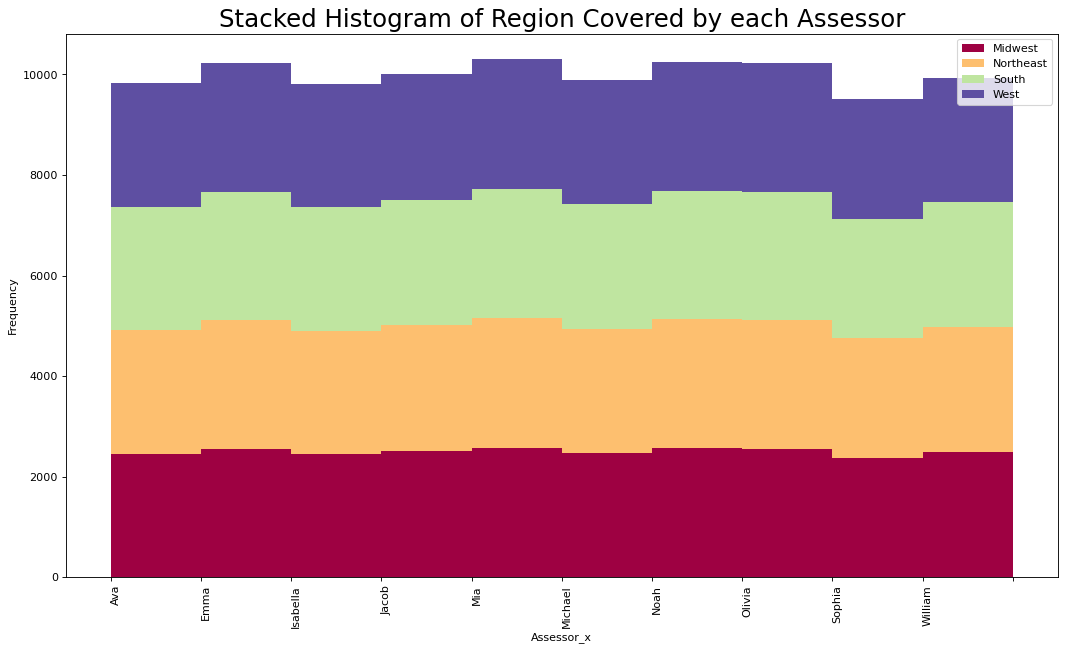

In [87]:
# create Histogram of Regions by assessor 
import matplotlib.pyplot as plt
import seaborn as sns
x_var = 'Assessor_x'
groupby_var = 'Region_x'
df_agg = main_df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [main_df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, main_df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(main_df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title("Stacked Histogram of Region Covered by each Assessor", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.xticks(ticks=bins, labels=np.unique(main_df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

In [92]:
# Create mask for individual participant 
Harrison = main_df[:1]

In [94]:
Harrison.to_excel('Harrison.xlsx', index=False)

# Connect CANS data to a SQL server

In [99]:
# set up connections
import sqlite3
conn = sqlite3.connect('Cans.db')
c = conn.cursor()

In [105]:
main_df.to_sql('Cans', conn, if_exists='replace', index = False)

In [112]:
c.execute('''  
SELECT [Child's_Name_x], DOB_x, Fire_Setting_x
FROM Cans
WHERE Fire_Setting_x > 2
ORDER BY DOB_x DESC
LIMIT 50
          ''')
for row in c.fetchall():
    print(row)

('Roberto Anderson', '12/31/2014', 3)
('Ryker Phillips', '12/31/2014', 3)
('Edwin Martinez', '12/31/2013', 3)
('Dawson Hall', '12/31/2013', 3)
('Javier Garcia', '12/31/2009', 3)
('Emilio Perez', '12/31/2009', 3)
('Lydia Miller', '12/31/2008', 3)
('Juan Lopez', '12/31/2007', 3)
('Roberto Johnson', '12/31/2005', 3)
('Wyatt Taylor', '12/31/2004', 3)
('Angel Turner', '12/31/2003', 3)
('Landon Perez', '12/31/2003', 3)
('Rafael Adams', '12/31/2003', 3)
('Landon Johnson', '12/30/2014', 3)
('Emmett Davis', '12/30/2014', 3)
('Zayden Adams', '12/30/2014', 3)
('Dallas Rodriguez', '12/30/2013', 3)
('Jordan Hernandez', '12/30/2012', 3)
('Owen Miller', '12/30/2012', 3)
('Gabrielle Martin', '12/30/2012', 3)
('Gage Carter', '12/30/2011', 3)
('Oliver Jackson', '12/30/2011', 3)
('Natalia Miller', '12/30/2010', 3)
('Jack Lewis', '12/30/2010', 3)
('Megan Brown', '12/30/2009', 3)
('Ezekiel Lewis', '12/30/2009', 3)
('Jayden Green', '12/30/2009', 3)
('Zane Walker', '12/30/2008', 3)
('Edgar Lee', '12/30/2007'

## Query returned as pandas DataFrame

In [113]:
fire_df = pd.read_sql_query("SELECT [Child's_Name_x], DOB_x, Fire_Setting_x FROM Cans WHERE Fire_Setting_x > 2 ORDER BY DOB_x ASC LIMIT 50;", conn)
fire_df

,Child's_Name_x,DOB_x,Fire_Setting_x
0,Ezekiel Harris,01/01/2004,3
1,Isabella Martinez,01/01/2004,3
2,Zayden Taylor,01/01/2005,3
3,Juan Campbell,01/01/2005,3
4,Braden Wilson,01/01/2006,3
...,...,...,...
45,Anderson Harris,01/03/2012,3
46,Melody Campbell,01/03/2012,3
47,Mackenzie Wright,01/03/2013,3
48,Liam Lewis,01/03/2013,3
